# МЛиТА 2013
# ИДЗ 2, вариант 3
## Выполнила: Григорьева Виктория, студентка ЛЭТИ, гр. 9306

Задание: Правильные скобочные записи, у которых внутри квадратных могут быть любые, а внутри круглых - ничего: ()[()[[()()]()[]]]

#### 1. Набор граничных примеров и контрпримеров, демонстрирующих уточнение языка.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Правильно</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Неправильно</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center">
            ()<br>
            ()[]<br>
            ()[]()[]<br>
            ()[()[]]<br>
            []
        </td>
        <td style="border: 1px solid black; text-align: center">
            (<br>
            [<br>
            )<br>
            ]<br>
            ([])<br>
            [(])<br>
            ())
        </td>
    </tr>
</table>

#### 2. КС-грамматика языка.

In [ ]:
<expr> ::= ()<next> | [<next>]<next>
<next> ::= <expr> | /\ #Пустой символ

#### 3. Грамматический разбор одного примера.

In [ ]:
() [ () [ () () [] ] ]

<expr>
() <next>
() <expr>
() [ <next> ] <next>
() [ <expr> ] <next>
() [ () <next> ] <next>
() [ () <expr> ] <next>
() [ () [ <next> ] <next> ] <next>
() [ () [ <expr> ] <next> ] <next>
() [ () [ () <next> ] <next> ] <next>
() [ () [ () <expr> ] <next> ] <next>
() [ () [ () () <next> ] <next> ] <next>
() [ () [ () () <expr> ] <next> ] <next>
() [ () [ () () [ <next> ] <next> ] <next> ] <next>
() [ () [ () [] <next> ] <next> ] <next>
() [ () [ () () [] ] <next> ] <next>
() [ () [ () () [] ] ] <next>
() [ () [ () () [] ] ] - correct

#### 4. Проверка того, что грамматика удовлетворяет однозначности ветвления по первому символу (принадлежит классу LL0).
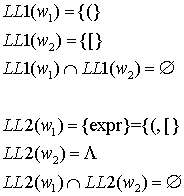

Грамматика удовлетворяет условию однозначности ветвления по первому символу

#### 5. Модифицированная грамматика (если исходная КС-грамматика не удовлетворяет условию однозначности ветвления).
Грамматика удовлетворяет условию.

#### 6. Таблица перевода языка в диаграммы
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Правило</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Диаграмма</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center">expr</td>
        <td style="border: 1px solid black"><img src="Images/expr.png"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align:center">next</td>
        <td style="border: 1px solid black"><img src="Images/next.png"></td>
    </tr>
</table>

#### 7. Таблица перевода синтаксических диаграмм в алгоритм синтаксического анализа.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Диаграмма</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Алгоритм</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black"><img src="Images/expr.png"></td>
        <td width=250 style="border: 1px solid black; text-align: left">
            <pre>
Expr:
{
    if char == '(':
    {
        read(char);
        if char == ')':
        {
            read(char);
            Next;
        }
        else error;
    }
    else if char == '[':
    {
        read(char);
        Next;
        if char == ']':
        {
            read(char);
            Next;
        }
        else error;
    }
    else error;
}
            </pre>
        </td>
     <tr>
     <tr>
        <td style="border: 1px solid black"><img src="Images/next.png"></td>
        <td width = 250 style="border: 1px solid black; text-align: left">
            <pre>
Next:
{
    if char == '/\':
    {
        Skip; #Пропуск
    }
    else Expr;
}
            <pre>
        </td>
    </tr>
</table>

#### 8. Таблица перевода алгоритма в программу.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Алгоритм</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Код (Python)</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: left">
            <pre>
Expr:
{
    if char == '(':
    {
        read(char);
        if char == ')':
        {
            read(char);
            Next;
        }
        else error;
    }
    else if char == '[':
    {
        read(char);
        Next;
        if char == ']':
        {
            read(char);
            Next;
        }
        else error;
    }
    else error;
} 
            </pre>
        <td width=280 style="border: 1px solid black; text-align: left">
            <pre>
def Expr(ch):
    if ch == '(':
        ch = read()
        if ch == ')':
            ch = read()
            ch = Next(ch)
        else: raise ValueError
    elif ch == '[':
        ch = read()
        ch = Next(ch)
        if ch == ']':
            ch = read()
            ch = Next(ch) 
        else: raise ValueError
    elif ch == '$':
        ch = ch
    else: raise ValueError
    return ch
            </pre>
        </td>
    </tr>
    <tr>
        <td width=230 style="border: 1px solid black; text-align: left">
            <pre>
Next:
{
    if char == '/\':
    {
        Skip; #Пропуск
    }
    else Expr;
}
            </pre>
        </td>
        <td style="border: 1px solid black; text-align:left">
            <pre>
def Next(ch):
    if ch == '(' or ch == '[':
        ch = Expr(ch)
    return ch
            </pre>
        </td>
    </tr>
</table>

#### 9. Исходный код программы.

In [1]:
def read():
    global s
    ret = s[0]
    s = s[1:]
    
    return ret

def Expr(ch):
    if ch == '(':
        ch = read()
        if ch == ')':
            ch = read()
            ch = Next(ch)
        else: raise ValueError
    elif ch == '[':
        ch = read()
        ch = Next(ch)
        if ch == ']':
            ch = read()
            ch = Next(ch)
            
        else: raise ValueError
    elif ch == '$':
        ch = ch #Пропуск при достижении конца строки
    else: raise ValueError
    
    return ch

def Next(ch):
    if ch == '(' or ch == '[':
        ch = Expr(ch)
    
    return ch

s = input('Enter your expression: ')
s = s + '$'
try:
    ch = read()
    ch = Expr(ch)
    if ch == '$': print('Correct')
    else: print('Incorrect')
except ValueError as ve:
    print('Incorrect')

Enter your expression: ()[()[()()[]]]
Correct
